## How to use this notebook
Any Jupyter Notebook (JN) is made of "text" (Markdown) and "code" cells. Code cells must be executed to see the result of the program. To run a cell, select it and press Shift + Enter. Using Shift + Enter multiple times will execute consecutive blocks of code one after another, while skipping text cells (executing them does nothing). It is important to run the code cells in the order they appear in the notebook.

A complete version of this JN is available by request to instructors using the book "Exploring mathematics with CAS assistance" for teaching. This version has blank or partially blank code lines that are supposed to be completed by the user before running the code.

Code cells contain (nonexecutable) comments preceded by the pound sign. The comments are of two types:
- a short comment placed on a code line typically states what the result of implementation of the encoded operation is
- a comment placed on a separate line either names the result of the following block of code lines or provides some details only for the next line where a more involved operation is encoded

This JN was written by Lydia Novozhilova.




# Lab 10: Speed of a skydiver
## Problem formulation
A skydiver opens a parachute when he/she reaches the speed of $s_0\,\text{m/s}.$
The total mass of the diver and parachute is $m\,\text{kg}.$ Assume that the air resistance $u$ is proprtional to the square of the velocity (wich is identified here with speed $s$), that is, $u(t)=Cs(t)^2$ for some constant $C.$
Do the following:
- (manual) Use Newton's Second Law to derive the differential equation for the speed of the diver and find its symbolic solution.
- Make a function **diver_speed(m,C,s0)** that uses the symbolic solution $s(t,m,C,s0)$, substitutes the parameters values and
returns the speed of a skydiver as a function of time.
- Test the function **diver_speed** on the following data: total weight $720\, \text{kg m/s}^2,\,C = 25\, \text{kg/m},\,s_0 = 10\, \text{m/s}.$ Use the gravitational constant $g = 9.8\, \text{m/s}^2.$
- Plot the velocity and acceleration for the test example.
- Suppose that the terminal speed for safe landing must be less or equal $6\,\text{m/s}.$ Estimate the maximal admissible total weight. Assume that $C = 20\, \text{kg/m}.$

For more details see Section 8.4.

## Hints for deriving and solving mathematical model of the diver's motion
- Using the Newton's Second Law, one can obtain
$$\dot{s}=c(k^2-s^2),\qquad  (*)$$
where $c$ and $k$ are defined  by the given parameters $m,\,g,\,C.$

- Separating the variables in this differential equation should be done manually. Then, to simplify technically involved integration in the variable $s$, the user can employ Sympy function **integrate**. The first code cell below gives an example of using this command. The initial condition specifies the value of a constant of integration.
- Applying potentiation and some algebratic manipulations to the result of integration, one can obtain
$$ s(t) = \frac{k(1+p\exp(-q\,t))}{1-p\exp(-q\,t)}.\qquad (**)$$
In this equation the value of constant $p$ is defined by the initial condition; the constant $q$ is determined by the parameters $w,\,C$ and the gravitational constant $g.$ Use the value $g=9.8\text{m/s}^2.$

## Brief description of this JN contents

The function **solve_model** involves encoding the results of manually done work: the ODE model $(*)$  and the speed function $(**).$ Since the templates of these functions are provided, the only task for the user is to specify parameters $c,k,p,q$ in terms of the given quantities. The built-in function **N(expr, n)** used in **solve_model** is equivalent to **expr.evalf(n)** in some previous labs.

The function **plot_task** makes a figure with two required plots. It is instructive to compare built-in Sympy plotting functions with similar commands of the Python library **mathplotlib.pyplot** used previously.

Using solution $(**)$ to the IVP for ODE $(*)$, the last task can be implemented manually. After some analysis, this can be done in one line of a simple calculation.




In [ ]:
# Loading Sympy library
from sympy import *


In [ ]:
# Example: Sympy function "integrate" demo

s = var('s')
integrate(1/(1-s**2),s)

-log(s - 1)/2 + log(s + 1)/2

In [ ]:
# Solving the IVP for ODE (*)

from sympy import *

def find_speed(w,s0,C,n):
  """
  Args:
    w: total weight
    s0: initial speed
    C: drag coefficient
    n: number of digits in decimal approximations
  Output:
    solution to ODE model of the diver's motion, the speed
  """
  var('t')
  g=9.8
  # Complete encoding of parameters in solution (**)
  k =N(Pow(?,?),n)
  p=N((?)/(?),n)
  q=N(2*Pow(?,?),n)

  sol = (k*(1+p*exp(-q*t)))/(?) # complete encoding of solution
  print("Diver's motion speed: s(t) = ",sol)
  print()
  return sol


In [ ]:
# Example

find_speed(920,10,25,4)

Diver's motion speed: s(t) =  (6.066 + 1.485*exp(-3.231*t))/(1 - 0.2448*exp(-3.231*t))



(6.066 + 1.485*exp(-3.231*t))/(1 - 0.2448*exp(-3.231*t))

In [ ]:
# Plotting speed and acceleration in one figure

def plot_task(w,s0,C,n):
  t = symbols('t')
  speed = find_speed(w,s0,C,n)
  accel = diff(speed)
  p1 = plot(speed,(t,0,1.5),label="speed",show=False, legend=True,size=(4,3))
  # fill in the blanks
  p2 = plot(?,(t,0,1.5),label="?",show=False, legend=True)
  p1.extend(p2)
  p1.show()


Diver's motion speed: s(t) =  (7.832 + 4.589*exp(-2.503*t))/(1 - 0.586*exp(-2.503*t))



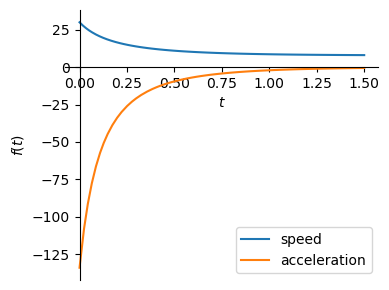

In [ ]:
# Example

plot_task(920.,30.,15.,4)